# Import Modules and Load Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [111]:
dataset=pd.read_csv(r'E:\python\project\creditcard.csv')
Row, Col = dataset.shape
print(f'There are {Row} rows and {Col} columns')
pd.options.display.max_columns = None
dataset.head()

There are 284807 rows and 31 columns


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preparing The Dataset

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

here is no missing data in the entire dataset.

In [11]:
print(dataset.duplicated().sum())
duplicates = dataset[dataset.duplicated()]
duplicate_counts_per_class = duplicates.groupby("Class").size()
print("duplicated record in each class:")
print(duplicate_counts_per_class)

1081
duplicated record in each class:
Class
0    1062
1      19
dtype: int64


In [112]:
dataset = dataset.drop_duplicates()
dataset.shape

(283726, 31)

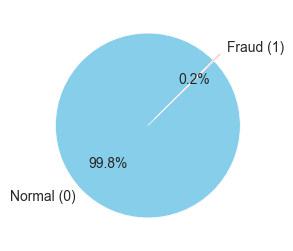

In [23]:
distribution = y.value_counts(normalize=True) * 100

plt.figure(figsize=(3, 3))
distribution.plot.pie(
    autopct='%1.1f%%',  
    labels=['Normal (0)', 'Fraud (1)'],  
    colors=['skyblue', 'red'], 
    startangle=45, 
    explode=[0, 0.1],  
)
plt.ylabel('') 
plt.show()

the dataset is highly imbalanced, with the majority class (0) comprising 99.8% and the minority class (1) only 0.2% of the data that requiring balancing techniques for better model performance.

##### Analyzing The Correlated Features

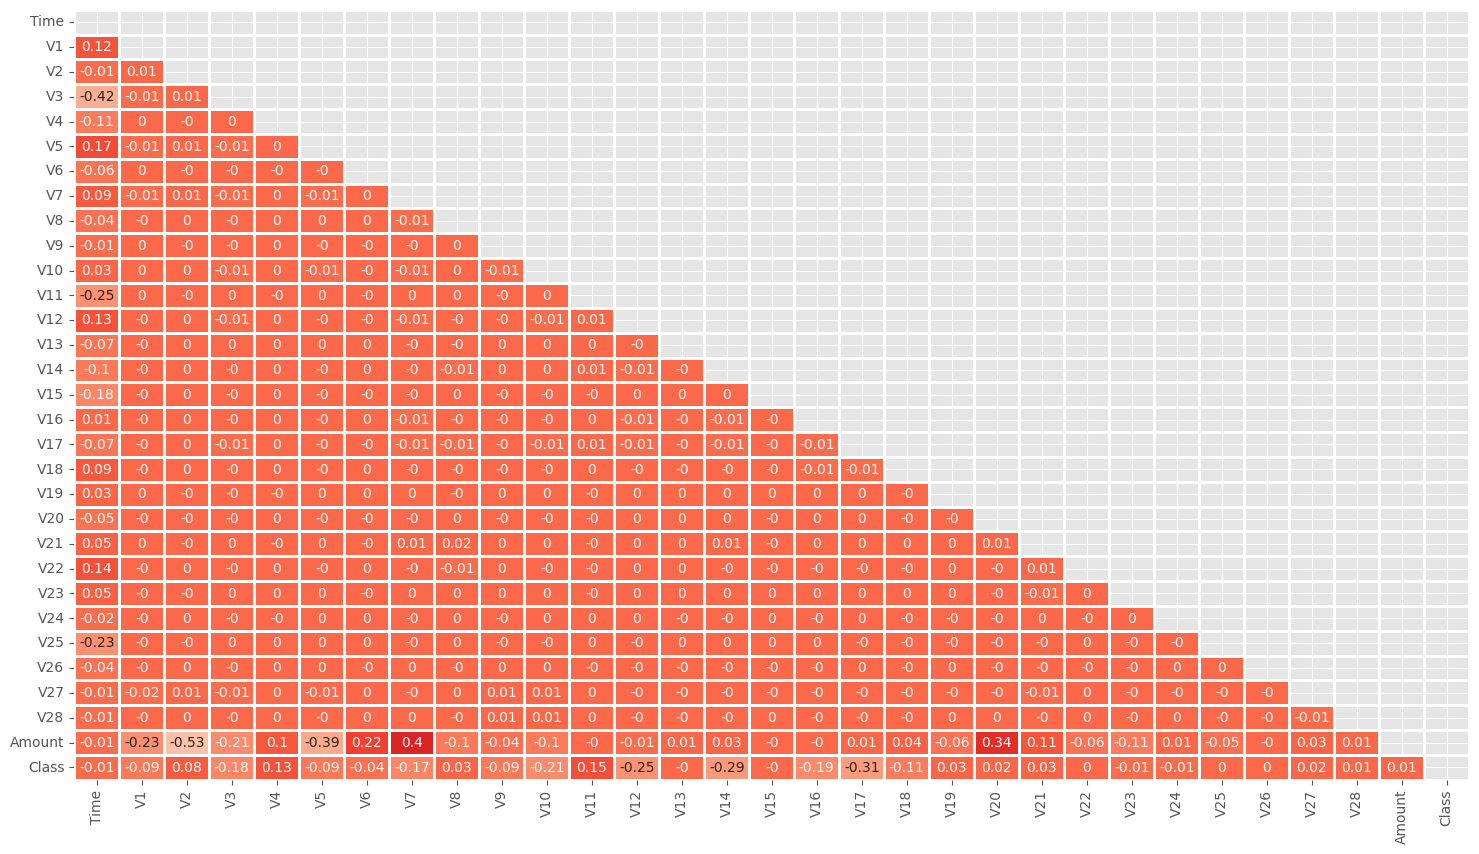

In [15]:
def corrMat(df,id=False):
    
    corr_mat = df.select_dtypes(include=[np.number]).corr().round(2)
    f, ax = plt.subplots(figsize=(18,10))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='Reds',square=False,lw=2,annot=True,cbar=False);plt.show()  


corrMat(dataset)

there is no notable correlation between features.

### analyze data in different transaction classes

In [29]:
fraud = dataset[dataset['Class']==1]
normal = dataset[dataset['Class']==0]

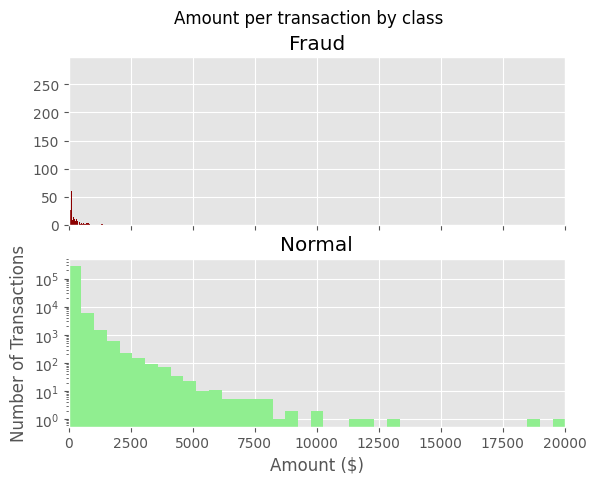

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins,color='darkred')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='lightgreen')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

Fraudulent transactions tend to be smaller, whereas normal transactions, while also mostly small, show a wider range of values.

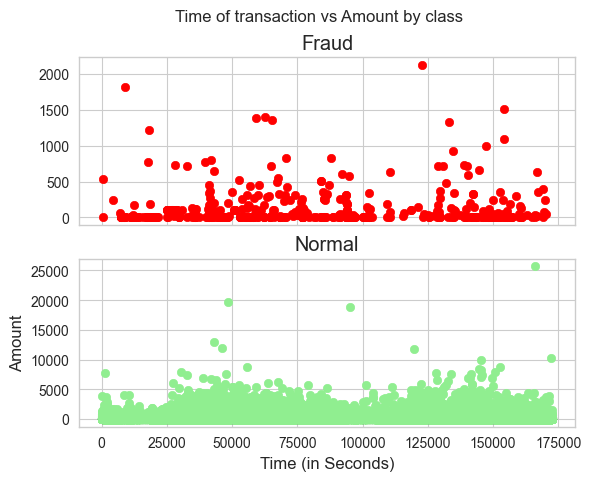

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount,color='red')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount, color='lightgreen')
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Fraudulent transactions don't follow a regular pattern and are more common during certain times. Normal transactions, on the other hand, happen consistently over time.

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [26]:
dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,0.007663,-0.006004,0.009476,0.000762,0.011668,0.001166,0.007845,0.010963,0.005120,-0.001382,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,-5.453274,3.716347,-6.103254,-0.094324,-6.835946,-0.072830,-4.000956,-6.463285,-2.157071,0.669143,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


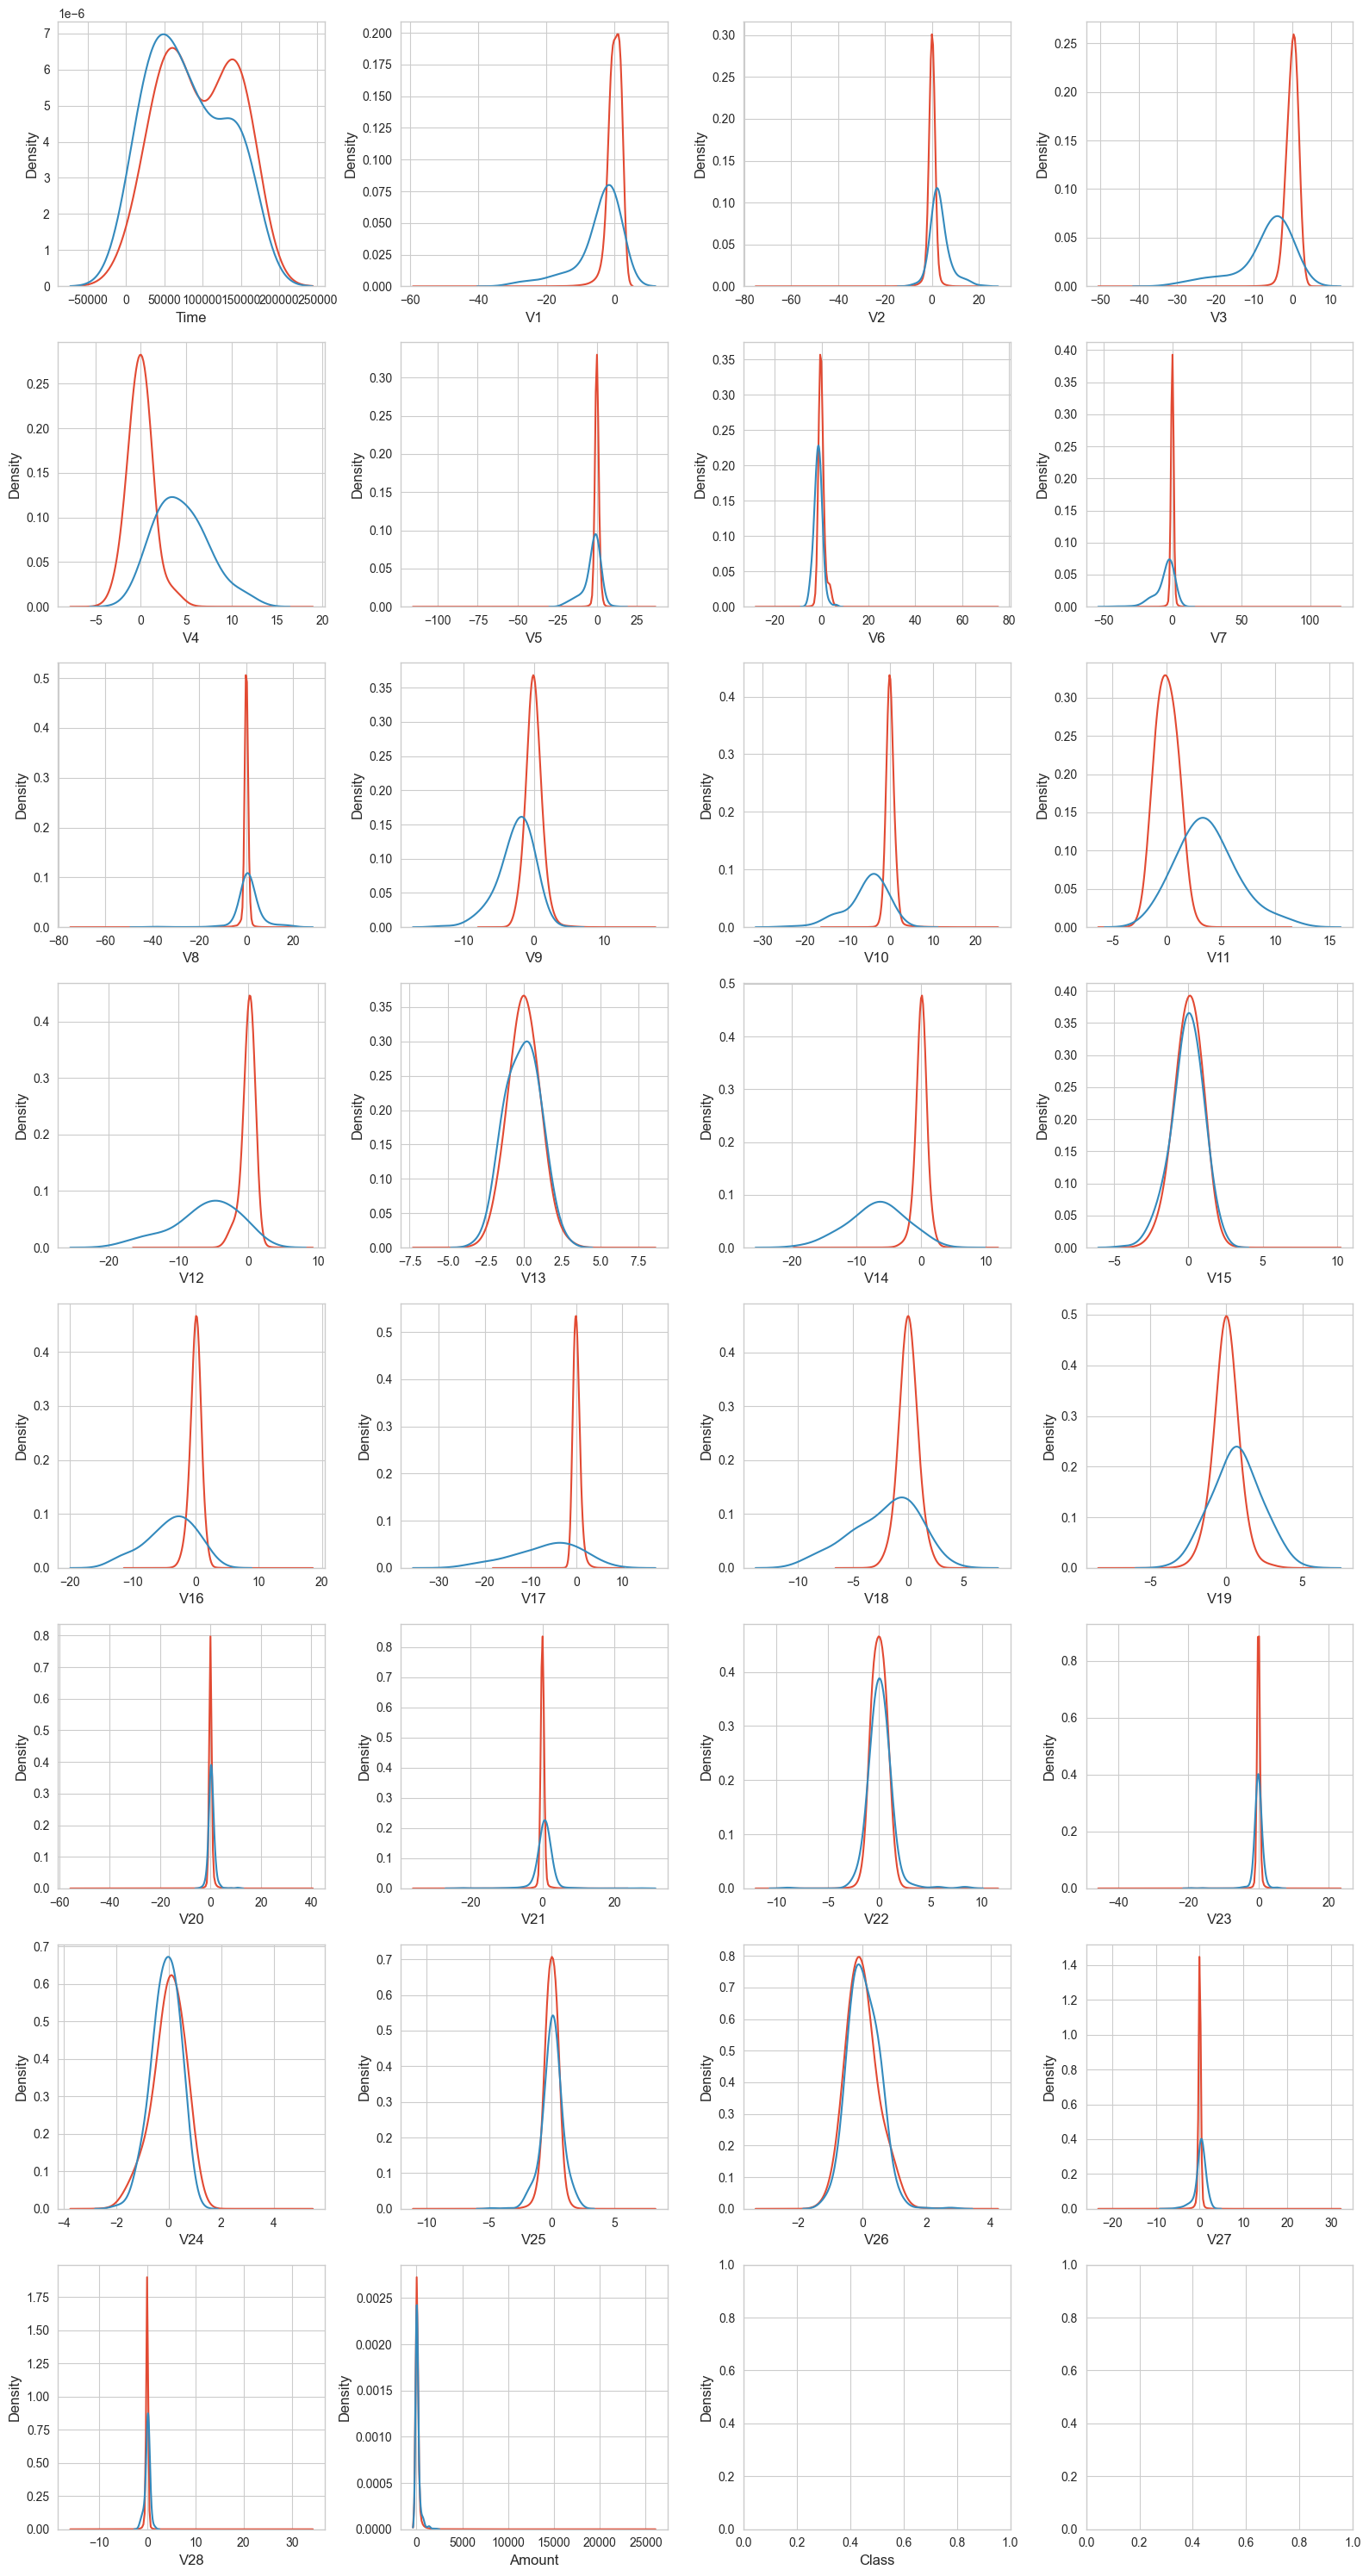

In [21]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(8, 4, figsize=(16, 30))
axes = axes.flatten() 

for i, feature in enumerate(dataset.columns):
    sns.kdeplot(normal[feature], bw=0.5, label="Class = 0", ax=axes[i])
    sns.kdeplot(fraud[feature], bw=0.5, label="Class = 1", ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].tick_params(axis='both', which='major', labelsize=10)


plt.tight_layout()
plt.show()

 Several features, such as V4, V11, and V14, demonstrate notable distributional differences between the two classes, suggesting their potential utility in fraud detection models. Conversely, some features like V25,V26 and Time appear to have similar distributions regardless of class.

In [113]:
dataset = dataset.drop(['Time'],axis=1)

In [114]:
sampledata, _ = train_test_split(dataset, train_size=0.1, stratify=dataset['Class'], random_state=1)
sampledata.shape

(28372, 30)

In [116]:
# Split data into training and testing
X = sampledata.drop('Class', axis=1)
y = sampledata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((22697, 29), (5675, 29))

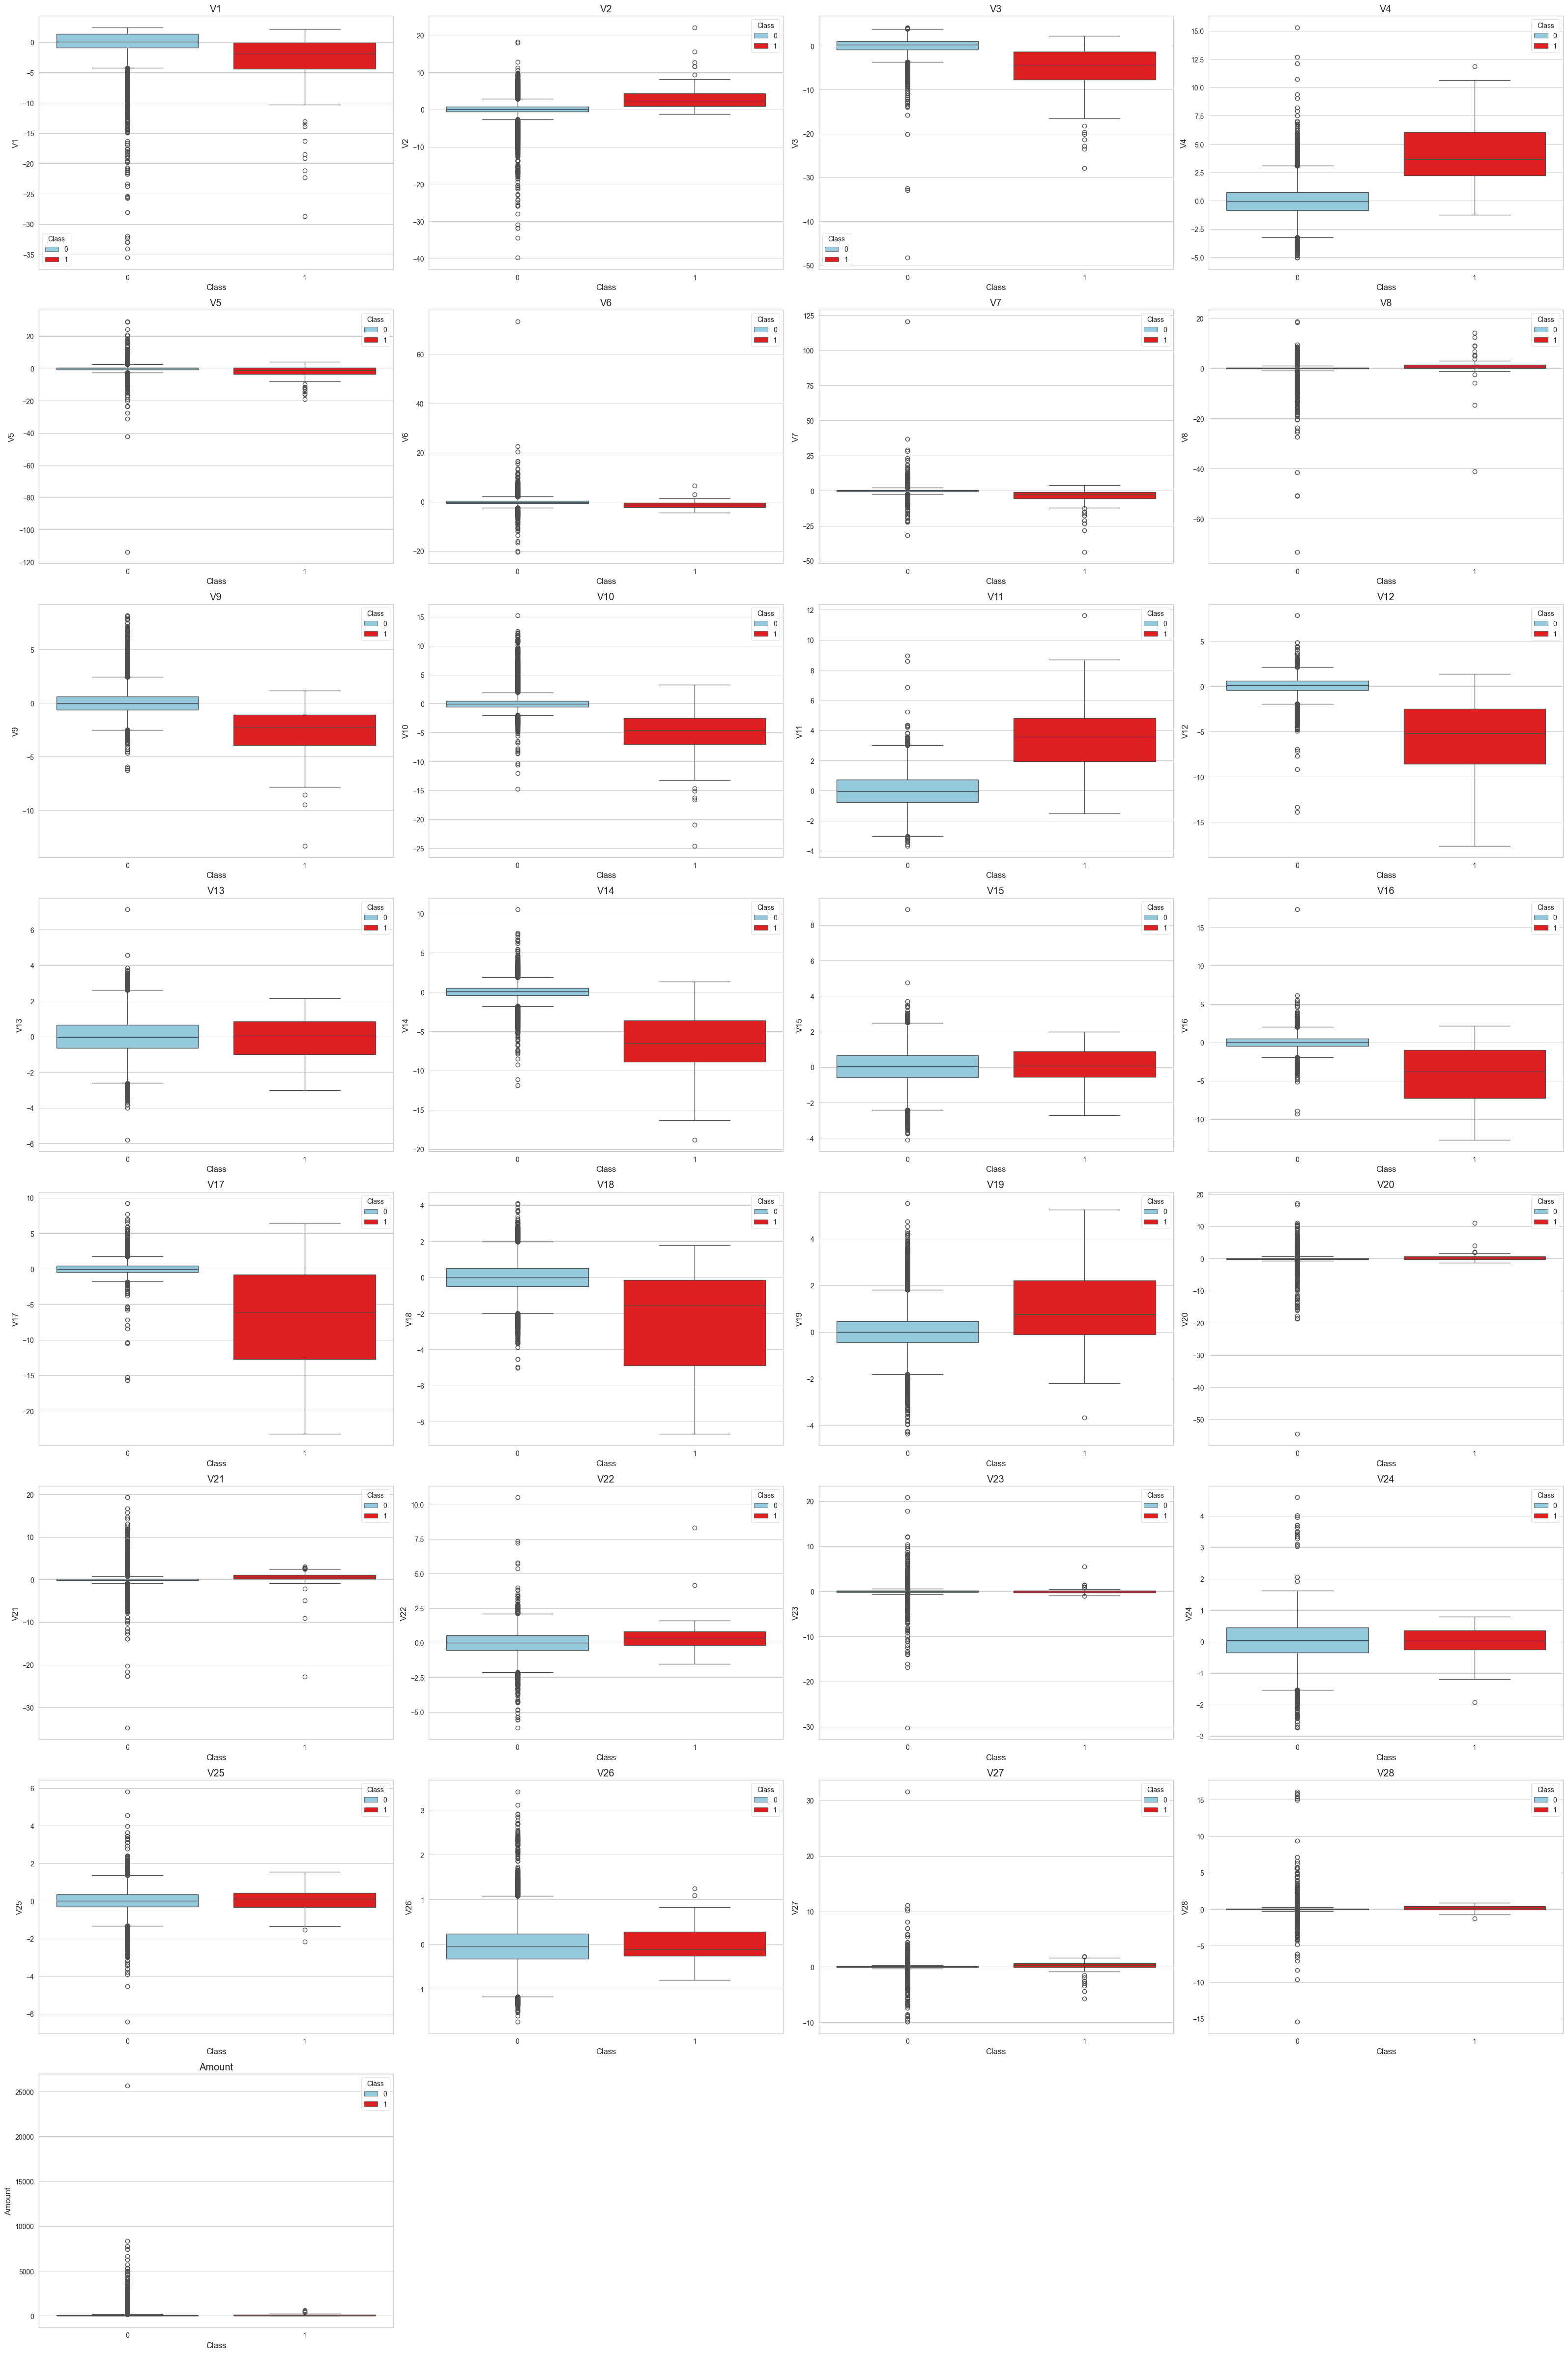

In [51]:
#Handling Outliers
num_columns = len(X_train.columns)
ncols = 4  
nrows = int(np.ceil(num_columns / ncols)) 

plt.figure(figsize=(ncols * 8, nrows * 6))  

for i, column in enumerate(X_train.columns):
    plt.subplot(nrows, ncols, i + 1) 
    sns.boxplot(x=y_train, y=X_train[column], hue=y_train,palette={0: "skyblue", 1: "red"})  
    plt.title(column)  
    plt.xlabel('Class')  
    plt.ylabel(column) 

plt.tight_layout() 
plt.show()

In [117]:
q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)
iqr = q3-q1
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
((X_train >upper_limit) |(X_train < lower_limit)).sum().sum()
outliers=((X_train >upper_limit) |(X_train < lower_limit))

from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
df =X_train.copy()
df[((df >upper_limit) |(df < lower_limit))]=np.nan
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(scaled_df)

original_scale_data = scaler.inverse_transform(imputed_data)
X_train_clean= pd.DataFrame(original_scale_data, columns=scaled_df.columns)


### Create Model and Evaluate

In [118]:
#Balance Dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_clean, y_train)
pd.Series(y_resampled_smote).value_counts()

Class
0    22659
1    22659
Name: count, dtype: int64

In [122]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_resampled_smote)
X_test = scaler.transform(X_test)


In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics

from keras import metrics

# 1. Define the model creation function
def create_model(opt='adam', metric_list=['accuracy']):
    model = Sequential()
    model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=metric_list)
    return model

# 2. Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 3. Wrap the model using KerasClassifier
model = KerasClassifier(
    model=create_model,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

# 4. Define the parameter grid
param_grid = {
    'model__opt': ['adam', 'rmsprop'],
    'model__metric_list': [
        [metrics.Precision()],
        [metrics.Recall()],
        [metrics.AUC()],
        [metrics.F1Score()]    ]
}

# 5. Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_resampled_smote)

# 6. Print the best parameters and accuracy
print("Best Parameters:", grid_result.best_params_)
print("Best Accuracy:", grid_result.best_score_)

# 7. Evaluate the best model on test data
best_model = grid_result.best_estimator_
test_loss, test_accuracy = best_model.score(X_test, y_test), None
print("Test Accuracy:", test_loss)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Epoch 1/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1026 - precision_9: 0.9555 - val_loss: 0.0049 - val_precision_9: 1.0000
Epoch 2/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5526e-04 - precision_9: 0.9999 - val_loss: 2.0322e-05 - val_precision_9: 1.0000
Epoch 3/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0073 - precision_9: 0.9971 - val_loss: 5.9579e-05 - val_precision_9: 1.0000
Epoch 4/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - precision_9: 0.9989 - val_loss: 1.6931e-05 - val_precision_9: 1.0000
Epoch 5/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2151e-05 - precision_9: 1.0000 - val_loss: 5.6257e-06 - val_precision_9: 1.0000
Epoch 6/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3984e-06 - precision_9: 1.0000 - val_loss: 1.2990e-06 - val_precision_9: 1.0000
Epoch 7/10
378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3236e-06 - precision_9: 1.0000 - val_loss: